In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#File read

test = pd.read_csv("test_nlp.csv")
train = pd.read_csv("train_nlp.csv")
submission = pd.read_csv("sample_submission.csv")

# 1. Exploratory Data Analysis

### 1.1 Basic feature creation and analysis by class

Class Distribution


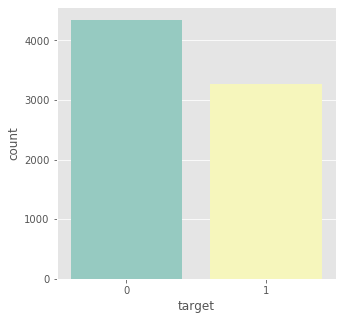

Words count distribution by Class


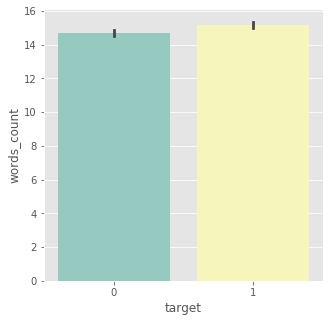

Average Word Length


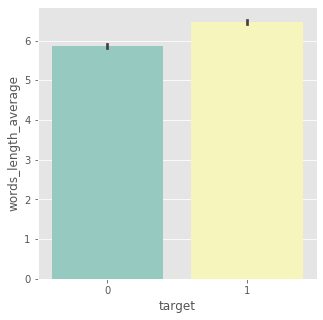

Number of Hasthtags


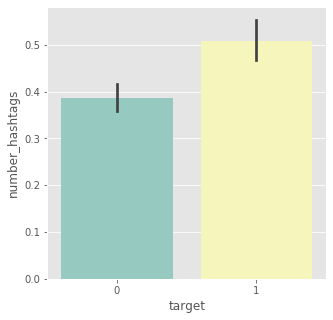

Number of Mentions


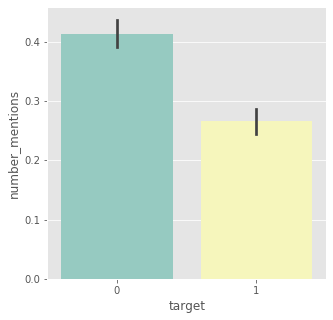

In [619]:

####### 1.1.1 Countplot for our target variable. ####### 
print("Class Distribution")
plt.figure(figsize=(5,5))
ax = sns.countplot(x="target",data=train, palette="Set3")
plt.show()


####### 1.1.2 Number of words per Tweet -Words Count- ####### 

train["words_list"] =[word.split() for word in train["text"]] #first we split the tweets into words
test["words_list"] =[word.split() for word in test["text"]]

train["words_count"] = train["words_list"].apply(len) #then we use the length function to get the number of words
test["words_count"] = test["words_list"].apply(len)

print("Words count distribution by Class")
plt.figure(figsize=(5,5))
ax = sns.barplot(x="target", y="words_count", data=train, palette="Set3") #the plot represents the mean
plt.show()

####### 1.1.3 Average Word Length #######

#First we create a function that gets the length of each word and apply to our previously created wordlist.
def word_length(x): 
 word_length = []
 for i in x:
    word_length.append(len(i))
 return(word_length)

train["words_length"] = train["words_list"].apply(word_length)
train["words_length_sum"] = train["words_length"].apply(sum) 
train["words_length_average"] = train["words_length_sum"]/ train["words_count"] #For this result, we take the sum and then divide by the number of words


test["words_length"] = test["words_list"].apply(word_length)
test["words_length_sum"] = test["words_length"].apply(sum)
test["words_length_average"] = test["words_length_sum"]/ test["words_count"]

print("Average Word Length") #We plot this resulting variable
plt.figure(figsize=(5,5))
ax = sns.barplot(x="target", y="words_length_average", data=train, palette="Set3")
plt.show()

####### 1.1.4 Number of Hasthtags #######

#We create a function that adds +1 everytime it finds a word which starts with #
def count_hashtags(x):
    number_hashtags = 0
    for word in x:
        if word.startswith("#"):
         number_hashtags += 1
    return number_hashtags

#then we apply to our words list and save the output as the number of hashtags 
train["number_hashtags"] = train["words_list"].apply(count_hashtags) 
test["number_hashtags"] = test["words_list"].apply(count_hashtags)

print("Number of Hasthtags")
plt.figure(figsize=(5,5))
ax = sns.barplot(x="target", y="number_hashtags", data=train, palette="Set3")
plt.show()


####### 1.1.5 Number of Mentions #######

#same process as before, but we take the words starting by "@"
def count_mentions(x):
    number_hashtags = 0
    for word in x:
        if word.startswith("@"):
         number_hashtags += 1
    return number_hashtags

train["number_mentions"] = train["words_list"].apply(count_mentions)
test["number_mentions"] = test["words_list"].apply(count_mentions)

print("Number of Mentions")
plt.figure(figsize=(5,5))
ax = sns.barplot(x="target", y="number_mentions", data=train, palette="Set3")

### 1.2 Most Common Words by Class Analysis

Most Common Words, Fake Disasters


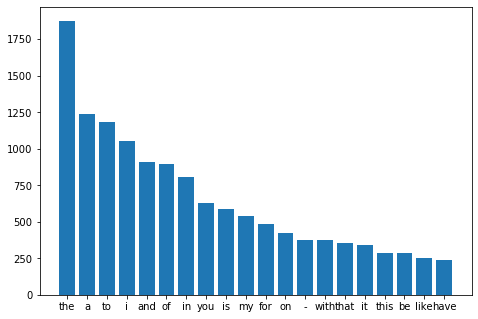

Most Common Words, Real Disasters


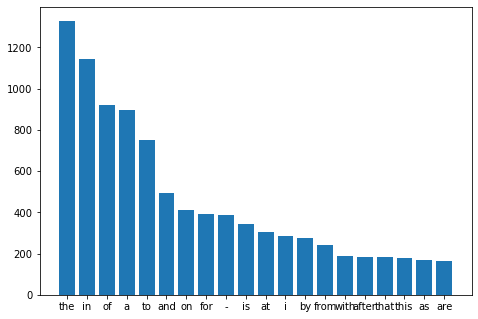

In [4]:
import matplotlib.pyplot as plt

#To get the most common words let's start by creating a function that lowers all the words in our words list and apply
def to_lower(x):
    lower_words = []
    for word in x:
        word_lower = word.lower()
        lower_words.append(word_lower)
        
    return (lower_words)

#we will apply this function into our words list and create a new column
train["text_lower"] = train["words_list"].apply(to_lower)
test["text_lower"] = test["words_list"].apply(to_lower)

#separate so we have a df for both real and fake tweets        
train_real = train.loc[train["target"]==1]
train_fake = train.loc[train["target"]==0]

#we will concatenate into a single dataframe
result_fake = pd.DataFrame(sum(train_fake["text_lower"], []))
result_real = pd.DataFrame(sum(train_real["text_lower"], []))

#and finally we are going to replace this DF with one that has the value counts of each word in our wordlist
result_fake = pd.DataFrame(result_fake[0].value_counts())
result_fake = result_fake.reset_index()
result_real = pd.DataFrame(result_real[0].value_counts())
result_real = result_real.reset_index()

#plotting
print("Most Common Words, Fake Disasters")
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(result_fake["index"].head(20),result_fake[0].head(20))
plt.show()
print("Most Common Words, Real Disasters")
fig = plt.figure()
ax_1 = fig.add_axes([0,0,1,1])
ax_1.bar(result_real["index"].head(20),result_real[0].head(20))
plt.show()

[nltk_data] Downloading package stopwords to /Users/lina/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


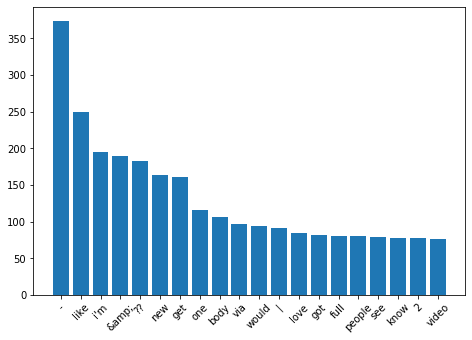

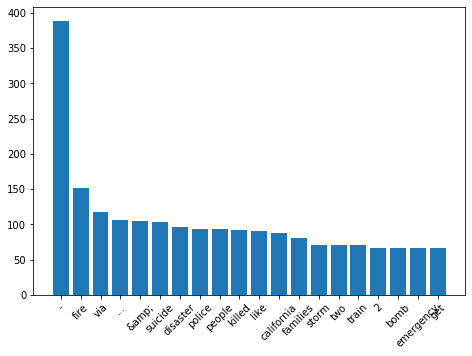

In [5]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
#define a function that filters the stopwords
def filter_stopwords(x):
    lower_words_nostopwords = []
    for word in x:
        if word not in stopwords.words("english"):
            lower_words_nostopwords.append(word)
            
        
    return (lower_words_nostopwords)

#apply to dataset
train["text_lower_nostopwrods"] = train["text_lower"].apply(filter_stopwords)
test["text_lower_nostopwrods"] = test["text_lower"].apply(filter_stopwords)

#filter by target value
train_fake = train.loc[train["target"]==0]
train_real = train.loc[train["target"]==1]

#put as df
result_fake = pd.DataFrame(sum(train_fake["text_lower_nostopwrods"], []))
result_real = pd.DataFrame(sum(train_real["text_lower_nostopwrods"], []))

#get the value counts for each of the stopwords
result_fake = pd.DataFrame(result_fake[0].value_counts())
result_fake = result_fake.reset_index()
result_real = pd.DataFrame(result_real[0].value_counts())
result_real = result_real.reset_index()

import matplotlib.pyplot as plt

#print the top 20
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(result_fake["index"].head(20),result_fake[0].head(20))
plt.xticks(rotation=45)
plt.show()
fig = plt.figure()
ax_1 = fig.add_axes([0,0,1,1])
ax_1.bar(result_real["index"].head(20),result_real[0].head(20))
plt.xticks(rotation=45)
plt.show()


#### 1.3 Basic Cleaning ####

In [432]:
import re
from nltk.tokenize import TweetTokenizer
tweet_tokenizer = TweetTokenizer()

#use the twitter tokenizer and apply our paste words functions
train["tweets_list_clean"] = [tweet_tokenizer.tokenize(tweet) for tweet in train["text"]] 
train["tweets_clean"] = train["tweets_list_clean"].apply(paste_words)
#use an additional regular expresion to remove urls.
#I took the regular expresion from here #https://github.com/s/preprocessor/issues/10
train["tweets_clean"] = [re.sub(r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))', '', tweet) for tweet in train["tweets_clean"]]


test["tweets_list_clean"] = [tweet_tokenizer.tokenize(tweet) for tweet in test["text"]] 
test["tweets_clean"] = test["tweets_list_clean"].apply(paste_words)
test["tweets_clean"] = [re.sub(r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))', '', tweet) for tweet in test["tweets_clean"]]



In [624]:
#Gensim
from gensim import utils
import gensim.parsing.preprocessing as gsp

#selet the gsp filters to use
filters = [
           gsp.strip_tags, 
           gsp.strip_punctuation,
           gsp.strip_multiple_whitespaces,
           gsp.strip_numeric,
           gsp.remove_stopwords, 
           gsp.strip_short, 
          ]
#function to clean the text using gensim filters
def clean_text(s):
    s = s.lower()
    s = utils.to_unicode(s)
    for f in filters:
        s = f(s)
    return s

#apply that function to a new column
train["text_gensim"] = train["text"].apply(clean_text)

## 2. Building a Baseline Model with a Pipeline

In [625]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix

#build pipeline using count vectorizer and NB model
text_clf = Pipeline([('vect', CountVectorizer()),
                      ('clf', MultinomialNB()), ])

#cross validation for cleaned tweets
scores_m = cross_validate(text_clf, train["tweets_clean"], train["target"], cv=10, scoring='f1')

print(scores_m["test_score"])
print(scores_m["test_score"].mean())

#cross validation for regular text tweets
text_clf = Pipeline([('vect', CountVectorizer()),
                      ('clf', MultinomialNB()), ])

scores_m = cross_validate(text_clf, train["text"], train["target"], cv=10, scoring='f1')

print(scores_m["test_score"])
print(scores_m["test_score"].mean())

#cross validation for gensim cleaned tweets
text_clf = Pipeline([('vect', CountVectorizer()),
                      ('clf', MultinomialNB()), ])

scores_m = cross_validate(text_clf, train["text_gensim"], train["target"], cv=10, scoring='f1')

print(scores_m["test_score"])
print(scores_m["test_score"].mean())

[0.67862969 0.58883249 0.58986175 0.56927711 0.67368421 0.64251969
 0.67391304 0.59931507 0.72496474 0.74532374]
0.6486321524557797
[0.68580542 0.5758092  0.60394537 0.5753012  0.67964072 0.64923077
 0.66978193 0.6109215  0.73684211 0.74170274]
0.6528980966490995
[0.67605634 0.52019386 0.56490728 0.51704545 0.63900415 0.62275449
 0.64663805 0.63736264 0.69542484 0.70985155]
0.6229238649640523


## 3. Advanced NLP 

### 3.1 POS Tagging ###

#### NLTK

In [434]:
nltk.download('averaged_perceptron_tagger')

############################ ESTIMATED RUNNING TIME : 5 MINUTES ############################

#Function to get the Pos Tag for each word
def pos_tag(x):
  pos_tuple = []
  for word in x:
   pos_tuple=(nltk.pos_tag(x))
   pos_tag =[]
   for element in pos_tuple:
    pos_tag.append(element[1])   
  return(pos_tag)

#Function to get the Pos Tag element for each word
def pos_tag_element(x):
  pos_tuple = []
  for word in x:
   pos_tuple=(nltk.pos_tag(x))
   pos_tag =[]
   for element in pos_tuple:
    pos_tag.append(element[0])   
  return(pos_tag)

#Applying pos_tag funcion and store the tags in a new column
train["pos_tags"] = train["words_list"].apply(pos_tag)
test["pos_tags"] = test["words_list"].apply(pos_tag)
train["pos_tags_clean"] = train["tweets_list_clean"].apply(pos_tag)
test["pos_tags_clean"] = test["tweets_list_clean"].apply(pos_tag)


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/lina/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [435]:
#Zip function that will return each word with each pos tag in the form word_postag
def zip_pos_tags(m,n):
    #new_tags= []   
    for tweet in m,n:
        new_tags = [m + "_" +str(n) for m,n in zip(m,n)]
        new_tags.append(new_tags)
    return new_tags[:-1]

#applying function to the word list and then pasting in a single column again
train['text_pos_tags'] = train.apply(lambda x: zip_pos_tags(x['words_list'], x['pos_tags']), axis=1)
train['text_pos_tags'] = train['text_pos_tags'].apply(paste_words)

#and also for the cleaned version
train['text_pos_tags_clean'] = train.apply(lambda x: zip_pos_tags(x['tweets_list_clean'], x['pos_tags_clean']), axis=1)
train['text_pos_tags_clean'] = train['text_pos_tags_clean'].apply(paste_words)

test['text_pos_tags'] = test.apply(lambda x: zip_pos_tags(x['words_list'], x['pos_tags']), axis=1)
test['text_pos_tags'] = test['text_pos_tags'].apply(paste_words)

#print to make sure it looks good
train['text_pos_tags'][0]
train['text_pos_tags_clean'][0]

'Our_PRP$ Deeds_NNS are_VBP the_DT Reason_NNP of_IN this_DT #earthquake_NN May_NNP ALLAH_NNP Forgive_NNP us_PRP all_DT'

In [490]:
#apply our pipeline to text with pos tags
text_clf = Pipeline([('vect', CountVectorizer()),
                      ('clf', MultinomialNB()), ])

scores_m = cross_validate(text_clf, train['text_pos_tags'], train["target"], cv=10, scoring='f1')

print(scores_m["test_score"])
print(scores_m["test_score"].mean())

text_clf = Pipeline([('vect', CountVectorizer()),
                      ('clf', MultinomialNB()), ])

#apply our pipeline to cleanedtext with pos tags

scores_m = cross_validate(text_clf, train['text_pos_tags_clean'], train["target"], cv=10, scoring='f1')

print(scores_m["test_score"])
print(scores_m["test_score"].mean())

[0.64102564 0.55379189 0.60883281 0.57187017 0.68501529 0.63914373
 0.65231788 0.64784053 0.73059361 0.74404762]
0.6474479165853742
[0.66561014 0.55172414 0.6163522  0.5664557  0.68674699 0.64840183
 0.64820847 0.57482993 0.74174174 0.74193548]
0.6442006619098871


#### Custom

In [437]:
#download brown data set and create a custom pos tagger
nltk.download('brown')
nltk.download('universal_tagset')

from nltk.corpus import brown
from nltk import DefaultTagger
from nltk import UnigramTagger
from nltk.tag import untag
from nltk import AffixTagger
from nltk import RegexpTagger

brown_news_tagged = brown.tagged_sents(categories='news', tagset='universal')


affix_tagger = AffixTagger(brown_news_tagged,backoff=DefaultTagger('OTHER') )

unigram_tagger = UnigramTagger(brown_news_tagged, backoff=affix_tagger)

regexp_tagger = RegexpTagger(
     [(r'^-?[0-9]+(.[0-9]+)?$', 'NUM'),   # cardinal numbers
      (r'(The|the|A|a|An|an)$', 'DET'),   # articles
      (r'.*able$', 'ADJ'),                # adjectives
      (r'.*ness$', 'NOUN'),               # nouns formed from adjectives
      (r'.*ly$', 'ADV'),                  # adverbs
      (r'.*s$', 'NOUN'),                  # plural nouns
      (r'.*ing$', 'VERB'),                # gerunds
      (r'.*ed$', 'VERB'),                 # past tense verbs
      (r'.*#', 'HASHTAG'), #hashtags !!NEW!!!
      (r'.*@', 'MENTION'), #mentions !!!NEW!!!

], backoff=unigram_tagger)

# Your code here

regexp_tagger.tag(train["words_list"][0])

[nltk_data] Downloading package brown to /Users/lina/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     /Users/lina/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


[('Our', 'DET'),
 ('Deeds', 'NOUN'),
 ('are', 'VERB'),
 ('the', 'DET'),
 ('Reason', 'NOUN'),
 ('of', 'ADP'),
 ('this', 'NOUN'),
 ('#earthquake', 'HASHTAG'),
 ('May', 'NOUN'),
 ('ALLAH', 'OTHER'),
 ('Forgive', 'ADJ'),
 ('us', 'NOUN'),
 ('all', 'PRT')]

In [438]:
#create our function
def pos_tag_regexp(x):
  pos_tuple = []
  for word in x:
   pos_tuple=(regexp_tagger.tag(x))
   pos_tag =[]
   for element in pos_tuple:
    pos_tag.append(element[1])   
  return(pos_tag)


#apply to both normal and cleaned version
train["pos_tags_regex"] = train["words_list"].apply(pos_tag_regexp)
test["pos_tags_regex"] = test["words_list"].apply(pos_tag_regexp)

train["pos_tags_regex_clean"] = train["tweets_list_clean"].apply(pos_tag_regexp)
test["pos_tags_regex_clean"] = test["tweets_list_clean"].apply(pos_tag_regexp)


In [813]:
#use zip to be able to join our 
train['text_pos_tags_regex'] = train.apply(lambda x: zip_pos_tags(x['words_list'], x['pos_tags_regex']), axis=1)
train['text_pos_tags_regex'] = train['text_pos_tags_regex'].apply(paste_words)

train['text_pos_tags_regex_clean'] = train.apply(lambda x: zip_pos_tags(x['tweets_list_clean'], x['pos_tags_regex_clean']), axis=1)
train['text_pos_tags_regex_clean'] = train['text_pos_tags_regex_clean'].apply(paste_words)
train['text_pos_tags_regex'][0]

'Our_DET Deeds_NOUN are_VERB the_DET Reason_NOUN of_ADP this_NOUN #earthquake_HASHTAG May_NOUN ALLAH_OTHER Forgive_ADJ us_NOUN all_PRT'

In [627]:
#apply pipeline to text with its respective pos tag

text_clf = Pipeline([('vect', CountVectorizer()),
                      ('clf', MultinomialNB()), ])

scores_m = cross_validate(text_clf, train['text_pos_tags_regex'], train["target"], cv=10, scoring='f1')

print(scores_m["test_score"])
print(scores_m["test_score"].mean())

#apply pipeline to cleaned text with its respective pos tag
text_clf = Pipeline([('vect', CountVectorizer()),
                      ('clf', MultinomialNB()), ])

scores_m = cross_validate(text_clf, train['text_pos_tags_regex_clean'], train["target"], cv=10, scoring='f1')

print(scores_m["test_score"])
print(scores_m["test_score"].mean())

[0.64433812 0.57482993 0.61783439 0.55727554 0.68292683 0.63823065
 0.66028708 0.60245184 0.73841555 0.74328358]
0.6459873511571714
[0.66040689 0.57627119 0.61154446 0.55299539 0.68778281 0.6553323
 0.65934066 0.58883249 0.73206442 0.73071325]
0.6455283848366211


## 3.2 Lemmatizaion ##

In [441]:
############################ ESTIMATED RUNNING TIME : 3.5 MINUTES ############################


import spacy
nlp = spacy.load('en')

#define function to get lemmas of each word
def get_lemmas(x):
    lemma_list= []
    x= nlp(x)
    for word in x:
        lemma_list.append(word.lemma_)
    return(lemma_list)

#apply function to clean and not clean text version
train["lemma_list"] = train["text"].apply(get_lemmas)
test["lemma_list"] = test["text"].apply(get_lemmas)
train["lemma_list_clean"] = train["tweets_clean"].apply(get_lemmas)
test["lemma_list_clean"] = test["tweets_clean"].apply(get_lemmas)

#use paste to put on a single column
train["text_lemmas"] = train["lemma_list"].apply(paste_words)
test["text_lemmas"] = test["lemma_list"].apply(paste_words)
train["text_lemmas_clean"] = train["lemma_list_clean"].apply(paste_words)
test["text_lemmas_clean"] = test["lemma_list_clean"].apply(paste_words)

In [992]:
#preview
print(train["text"][2])
print(train["text_lemmas"][2])

All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected
all resident ask to ' shelter in place ' be be notify by officer . no other evacuation or shelter in place order be expect


In [443]:
#apply pipeline to non cleaned version
text_clf = Pipeline([('vect', CountVectorizer()),
                      ('clf', MultinomialNB()), ])

scores_m = cross_validate(text_clf, train["text_lemmas"], train["target"], cv=10, scoring='f1')

print(scores_m["test_score"])
print(scores_m["test_score"].mean())

#apply pipeline to clean version

text_clf = Pipeline([('vect', CountVectorizer()),
                      ('clf', MultinomialNB()), ])

scores_m = cross_validate(text_clf, train["text_lemmas_clean"], train["target"], cv=10, scoring='f1')

print(scores_m["test_score"])
print(scores_m["test_score"].mean())

[0.69375    0.59531773 0.61016949 0.58272328 0.69069069 0.6556391
 0.65705128 0.59515571 0.74709302 0.73623188]
0.656382218406922
[0.68944099 0.59468439 0.60643185 0.57393851 0.68350669 0.6431853
 0.6509434  0.59487179 0.74384949 0.73669065]
0.6517543055913801


## 3.3 Stemming ##

In [444]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

#function to get the word stems
def get_stemms(x):
    stemm_list= []
    for word in x:
        stemm_list.append(stemmer.stem(word))

        return(stemm_list)

    #apply along with our paste function
train["stem_list"] = train["words_list"].apply(get_stemms)
test["stem_list"] = test["words_list"].apply(get_stemms)

train["text_stem"] = train["stem_list"].apply(paste_words)
test["text_stem"] = test["stem_list"].apply(paste_words)

from nltk.stem.snowball import SnowballStemmer
snowball_stemmer = SnowballStemmer("english")

#same process but for snowball stemms
def get_stemms_snowball(x):
    stemm_list= []
    for word in x:
        stemm_list.append(snowball_stemmer .stem(word))
    return(stemm_list)

train["stem_list_snowball"] = train["words_list"].apply(get_stemms_snowball)
test["stem_list_snowball"] = test["words_list"].apply(get_stemms_snowball)

train["text_stem_snowball"] = train["stem_list_snowball"].apply(paste_words)
test["text_stem_snowball"] = test["stem_list_snowball"].apply(paste_words)

In [996]:
#preview
print(train["text_stem"][3])
print(train["text_stem_snowball"][3])

13,000 peopl receiv #wildfir evacu order in california
13,000 peopl receiv #wildfir evacu order in california


In [446]:
#apply our pipeline to each
text_clf = Pipeline([('vect', CountVectorizer()),
                      ('clf', MultinomialNB()), ])

scores_m = cross_validate(text_clf, train["text_stem"], train["target"], cv=10, scoring='f1')

print(scores_m["test_score"])
print(scores_m["test_score"].mean())

text_clf = Pipeline([('vect', CountVectorizer()),
                      ('clf', MultinomialNB()), ])

scores_m = cross_validate(text_clf, train["text_stem_snowball"], train["target"], cv=10, scoring='f1')

print(scores_m["test_score"])
print(scores_m["test_score"].mean())

[0.68       0.58374793 0.60530421 0.57979502 0.68489209 0.65355522
 0.68051118 0.58961474 0.74561404 0.72622478]
0.6529259208283988
[0.67692308 0.58512397 0.60436137 0.5755814  0.68786127 0.64946889
 0.6784     0.59197324 0.74302496 0.73699422]
0.6529712400957493


### 3.4 KeyWord and Location Columns


In [448]:
#paste all together on a new column
train["text_keywords_location"] = train["text"] + " " + str(train["keyword"]) + " " + str(train["location"])

text_clf = Pipeline([('vect', CountVectorizer()),
                      ('clf', MultinomialNB()), ])
#apply pipeline 
scores_m = cross_validate(text_clf, train["text_keywords_location"], train["target"], cv=10, scoring='f1')

print(scores_m["test_score"])
print(scores_m["test_score"].mean())

[0.65384615 0.56554307 0.61073826 0.56218058 0.67752443 0.61590525
 0.66328257 0.59744991 0.75914634 0.74725275]
0.6452869304124904


## NER ###

In [449]:
import spacy 
nlp = spacy.load('en')

#turn text, lemmas and clean+lemmas to doc
train["doc"] =  train["text"].apply(nlp)
train["doc_lemma"] =  train["text_lemmas"].apply(nlp)
train["doc_lemma_clean"] =  train["text_lemmas_clean"].apply(nlp)

#same for test
test["doc"] = test["text"].apply(nlp)
test["doc_lemma"] = test["text_lemmas"].apply(nlp)
test["doc_lemma_clean"] = test["text_lemmas_clean"].apply(nlp)


In [628]:
#get the entities 
def get_ner(doc):
 ner = doc.ents
 return(ner)

#apply to each of the columns we want to
train["ner"] = train["doc"].apply(get_ner)
train["ner_lemma"] = train["doc_lemma"].apply(get_ner)
train["ner_lemma_clean"] = train["doc_lemma_clean"].apply(get_ner)


test["ner"] = test["doc"].apply(get_ner)
test["ner_lemma"] = test["doc_lemma"].apply(get_ner)
test["ner_lemma_clean"] = test["doc_lemma_clean"].apply(get_ner)

#get the labels of those entities we just greated
def get_ner_label(doc):
 label = []
 for i in doc:
        label.append(i.label_)
 return(label)

#apply the function to train data
train["label"] = train["ner"].apply(get_ner_label)
train["label_lemma"] = train["ner_lemma"].apply(get_ner_label)
train["label_lemma_clean"] = train["ner_lemma_clean"].apply(get_ner_label)

#and test data
test["label"] = test["ner"].apply(get_ner_label)
test["label_lemma"] = test["ner_lemma"].apply(get_ner_label)
test["label_lemma_clean"] = test["ner_lemma_clean"].apply(get_ner_label)

In [451]:
# we are going to paste the entity labels in a single column
train["label_pasted"] = train["label"].apply(paste_words)
train["label_pasted_lemma"] = train["label_lemma"].apply(paste_words)
train["label_pasted_lemma_clean"] = train["label_lemma_clean"].apply(paste_words)
#for test as well
test["label_pasted"] = test["label"].apply(paste_words)
test["label_pasted_lemma"] = test["label_lemma"].apply(paste_words)
test["label_pasted_lemma_clean"] = test["label_lemma_clean"].apply(paste_words)


#and now we are going to paste together the text columns with the respective ner for each
train["text_ner"] = train["text"] + " " + train["label_pasted"]
train["text_ner_lemma"] = train["text_lemmas"] + " " + train["label_pasted_lemma"]
train["text_ner_lemma_clean"] = train["text_lemmas_clean"] + " " + train["label_pasted_lemma_clean"]

test["text_ner"] = test["text"] + " " + test["label_pasted"]
test["text_ner_lemma"] = test["text_lemmas"] + " " + test["label_pasted_lemma"]
test["text_ner_lemma_clean"] = test["text_lemmas_clean"] + " " + test["label_pasted_lemma_clean"]

In [1005]:
#previewof ner tags
print(test["ner"][4])
print(test["ner_lemma"][4])
print(test["ner_lemma_clean"][4])

(Typhoon Soudelor, 28, China, Taiwan)
(Typhoon Soudelor, 28, China, Taiwan)
(Typhoon Soudelor, 28, China, Taiwan)


In [452]:
#preview 
print(test["text_ner"][4])
print(test["text_ner_lemma"][4])
print(test["text_ner_lemma_clean"][4])

Typhoon Soudelor kills 28 in China and Taiwan ORG CARDINAL GPE GPE
Typhoon Soudelor kill 28 in China and Taiwan ORG CARDINAL GPE GPE
Typhoon Soudelor kill 28 in China and Taiwan ORG CARDINAL GPE GPE


In [1006]:
#pipeline for text + ner
text_clf = Pipeline([('vect', CountVectorizer()),
                      ('clf', MultinomialNB()), ])

scores_m = cross_validate(text_clf, train["text_ner"], train["target"], cv=10, scoring='f1')

print(scores_m["test_score"])
print(scores_m["test_score"].mean())

#pipeline for text lemmas + ner
text_clf = Pipeline([('vect', CountVectorizer()),
                      ('clf', MultinomialNB()), ])

scores_m = cross_validate(text_clf, train["text_ner_lemma"], train["target"], cv=10, scoring='f1')

print(scores_m["test_score"])
print(scores_m["test_score"].mean())

#pipeline for cleaned text lemmas + ner
text_clf = Pipeline([('vect', CountVectorizer()),
                      ('clf', MultinomialNB()), ])

scores_m = cross_validate(text_clf, train['text_ner_lemma_clean'], train["target"], cv=10, scoring='f1')

print(scores_m["test_score"])
print(scores_m["test_score"].mean())

[0.67623604 0.59866221 0.60542169 0.56886228 0.68468468 0.64705882
 0.68389058 0.6214876  0.73968706 0.74220963]
0.6568200590443101
[0.69525268 0.60066007 0.62058372 0.58605974 0.68759342 0.66467958
 0.66666667 0.60971524 0.74160584 0.74822191]
0.6621038868069978
[0.69230769 0.60655738 0.61702128 0.58655222 0.68656716 0.65967016
 0.65842349 0.60168067 0.74744526 0.74285714]
0.6599082456148093


## 4. Tuning ##

In [971]:
# Tune only for the count vectorizer parameters
text_clf = Pipeline([('vect', CountVectorizer()),
                      ('clf', MultinomialNB()), ])

from sklearn.model_selection import GridSearchCV

parameters = {'vect__ngram_range': [(1, 1), (1, 2),(1,3)],  'vect__strip_accents' :('ascii','unicode',None) ,'vect__lowercase' :(True,False), 'vect__stop_words' :("english",None),
 }

gs_clf = GridSearchCV(text_clf, parameters, n_jobs=-1)
gs_clf = gs_clf.fit(train['text_ner_lemma'], train["target"])
print(gs_clf.best_score_)
print(gs_clf.best_params_)


0.7312553116773641
{'vect__lowercase': True, 'vect__ngram_range': (1, 2), 'vect__stop_words': None, 'vect__strip_accents': 'unicode'}


In [972]:
#prediction
y_pred = gs_clf.best_estimator_.predict(test["text_ner_lemma"])
submission["target"] = y_pred
submission.to_csv('multinomialnb_notfid_1.csv', index = False)

In [314]:
############################ ESTIMATED RUNNING TIME : 1h 16 MINUTES ############################

#pipeline tunning for hyperparameters on each of the pipeline steps
text_clf_1 = Pipeline([('vect', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('clf', MultinomialNB()), ])


parameters = {'vect__ngram_range': [(1, 1), (1, 2),(2,2)],  'vect__strip_accents' :('ascii','unicode',None) ,'vect__lowercase' :(True,False), 'vect__stop_words' :("english",None),
               'tfidf__use_idf': (True, False),'tfidf__norm':("l1","l2",None),'tfidf__smooth_idf':(True,False),'tfidf__sublinear_tf':(True,False),
               'clf__alpha' : (0,0.5,1), 'clf__fit_prior':(True,False)
 }

gs_clf_1 = GridSearchCV(text_clf_1, parameters, n_jobs=-1)
gs_clf_1 = gs_clf_1.fit(train["text_ner_lemma"], train["target"])
print(gs_clf_1.best_score_)
print(gs_clf_1.best_params_)

0.7407126642467707
{'clf__alpha': 0.5, 'clf__fit_prior': True, 'tfidf__norm': 'l2', 'tfidf__smooth_idf': False, 'tfidf__sublinear_tf': False, 'tfidf__use_idf': True, 'vect__lowercase': True, 'vect__ngram_range': (1, 2), 'vect__stop_words': None, 'vect__strip_accents': 'ascii'}


In [337]:
y_pred = gs_clf_1.best_estimator_.predict(test["text_ner_lemma"])
submission["target"] = y_pred
submission.to_csv('multinomialnb_tfid_2_fixed.csv', index = False)

### 4.2 Neural Networks ###

In [1016]:
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split

#split into train and test, as cross validation can be trickier for neutral nets
tweets_train, tweets_test, y_train, y_test = train_test_split(
  train['text_ner_lemma'], train["target"], test_size=0.20, random_state=3)

In [1017]:
#initiate a count vectorize
vectorizer = CountVectorizer()
vectorizer.fit(tweets_train)

#apply vectorizer to train and test and X_test_real, which is the one we will want to predict
X_train = vectorizer.transform(tweets_train)
X_test  = vectorizer.transform(tweets_test)
X_test_real= vectorizer.transform(test["text_ner_lemma"])


In [1018]:
input_dim = X_train.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(16, input_dim=input_dim, activation='relu'))
#model.add(layers.Dense(8, activation="relu")) #this layer did not help!
model.add(Dropout(0.2)) #layer to account for overfitting
model.add(layers.Dense(1, activation='sigmoid'))

##### Define a function to calculate the f1, as it is not built in in keras
# I grabbed the code from here #https://datascience.stackexchange.com/questions/45165/how-to-get-accuracy-f1-precision-and-recall-for-a-keras-model

from keras import backend as K
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


#compile the model
model.compile(loss='binary_crossentropy', #for binary classification
              optimizer='adam', 
              metrics=[f1_m]) #input of the previously calculated f1
model.summary()

#compute class weights to account for class imbalance
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y_train)

#run our model
history = model.fit(X_train, y_train,
                    epochs=25,
                    verbose=False,class_weight = class_weights,
                    validation_data=(X_test, y_test),
                     batch_size=380)

#print accuracy
loss, f1_m = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(f1_m))
loss, f1_m = model.evaluate(X_test, y_test, verbose=False)
print("Training Accuracy: {:.4f}".format(f1_m))

Model: "sequential_409"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_900 (Dense)            (None, 16)                271984    
_________________________________________________________________
dropout_134 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_901 (Dense)            (None, 1)                 17        
Total params: 272,001
Trainable params: 272,001
Non-trainable params: 0
_________________________________________________________________
Training Accuracy: 0.9787
Training Accuracy: 0.7556


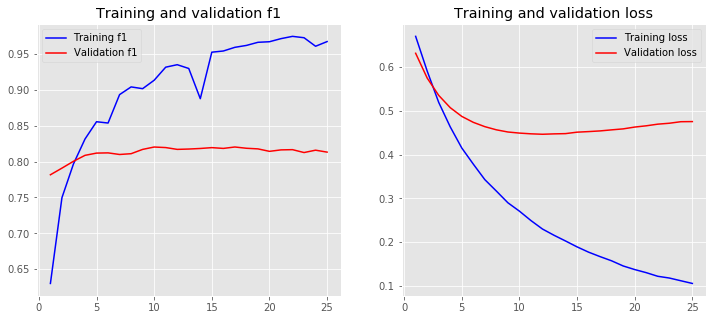

In [1020]:
### plot our model performance
#To get the plot I grabbed the plotting function found below and twiched so it would
#plot f1 instead of accuracy.
#https://datascience.stackexchange.com/questions/45165/how-to-get-accuracy-f1-precision-and-recall-for-a-keras-model to 

import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['f1_m']
    val_acc = history.history['val_f1_m']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training f1')
    plt.plot(x, val_acc, 'r', label='Validation f1')
    plt.title('Training and validation f1')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    
plot_history(history)

In [968]:
#Final predictions - BEST KAGGLE SCORE!
y_pred = model.predict(X_test_real)
y_pred = pd.DataFrame(y_pred) 
y_pred = round(y_pred,0) #since neural networks estimates the probabilities I rounded the results to get 0's and 1's
y_pred = y_pred.astype(int)
y_pred[0].value_counts() #making sure values make sense



0    2039
1    1224
Name: 0, dtype: int64

In [ ]:
submission["target"] = y_pred
submission.to_csv('submission15_nn_4_ner_lemma_classweight.csv', index = False)

### Extra effort : Neural Network with word embedding
Following https://realpython.com/python-keras-text-classification/

In [1027]:
#running again the whole model

X_train, X_test, y_train, y_test = train_test_split(
 train["text_lemmas_clean"], train["target"], test_size=0.20, random_state=1000) #using the clean version instead of the non clean

from keras.preprocessing.text import Tokenizer

#using the tokenizer suggested on the tutorial
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
X_test_real = tokenizer.texts_to_sequences(test["text_lemmas_clean"])

#set the vocab size
vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

from keras.preprocessing.sequence import pad_sequences

maxlen = 100

# Step to make sure that all sequences have the same number of words by appending 0s
X_train  = pad_sequences(X_train , padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test , padding='post', maxlen=maxlen)
X_test_real = pad_sequences(X_test_real , padding='post', maxlen=maxlen)

import numpy as np

#function to create the embedding matrix from the tutorial
def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix
#creating the matrix
embedding_dim = 50
embedding_matrix = create_embedding_matrix(
     'glove.6B.300d.txt',
     tokenizer.word_index, embedding_dim)

nonzero_elements = np.count_nonzero(np.count_nonzero(embedding_matrix, axis=1))
nonzero_elements / vocab_size


0.7328987787517794

Model: "sequential_412"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_23 (Embedding)     (None, 100, 50)           667700    
_________________________________________________________________
global_max_pooling1d_23 (Glo (None, 50)                0         
_________________________________________________________________
dense_906 (Dense)            (None, 16)                816       
_________________________________________________________________
dense_907 (Dense)            (None, 1)                 17        
_________________________________________________________________
dropout_137 (Dropout)        (None, 1)                 0         
Total params: 668,533
Trainable params: 668,533
Non-trainable params: 0
_________________________________________________________________


/Users/lina/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Training Accuracy: 0.9754
Training Accuracy: 0.7175


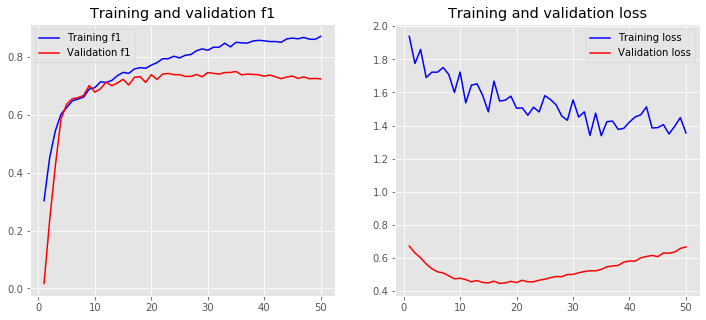

In [1026]:
#running the same model but taking account the embedding features

from keras import backend as K
#https://datascience.stackexchange.com/questions/45165/how-to-get-accuracy-f1-precision-and-recall-for-a-keras-model
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

model = Sequential()
#embedding layer
model.add(layers.Embedding(vocab_size, embedding_dim, 
                           weights=[embedding_matrix], 
                           input_length=maxlen, 
                           trainable=True))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.add(Dropout(0.2))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=[f1_m])
model.summary()

history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=False,
                    validation_data=(X_test, y_test),
                     batch_size=150, class_weight=class_weights)

loss, f1_m = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(f1_m))
loss, f1_m = model.evaluate(X_test, y_test, verbose=False)
print("Training Accuracy: {:.4f}".format(f1_m))

plot_history(history)